In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

# Load pre-trained ResNet50 model
model = ResNet50(weights='imagenet')


In [ ]:
print(model.summary())

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
img_path = '/content/cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
#x = preprocess_input(x)
x = tf.expand_dims(x, axis=0)
x /= 255

In [ ]:
import tensorflow
import keras

In [ ]:
#x = tensorflow.keras.applications.resnet50.preprocess_input(x)

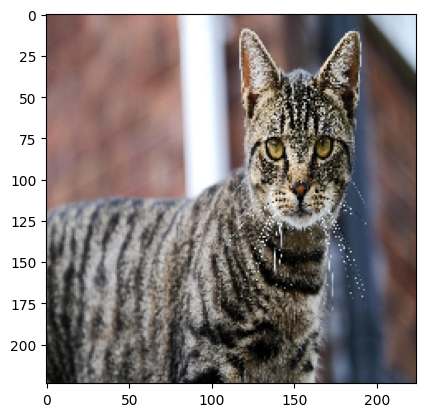

In [ ]:
plt.imshow(img)

In [ ]:
print(x.dtype)

<dtype: 'float32'>


In [ ]:
import tensorflow as tf

tf.compat.v1.disable_eager_execution()
disable_eager_execution()

In [ ]:
print(x)

Tensor("truediv:0", shape=(1, 224, 224, 3), dtype=float32)


In [ ]:
imgSize = x.shape
print(imgSize)

(1, 224, 224, 3)


In [ ]:
print(len(model.layers))

177


In [ ]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:177]][1:]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
activations = activation_model.predict(x, steps=1)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [ ]:
print(activations[0].shape)

(1, 230, 230, 3)


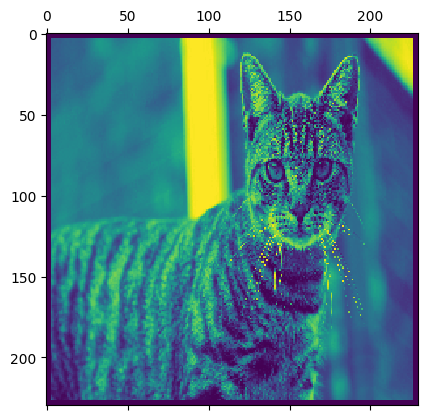

In [ ]:
first_layer_act = activations[0]
plt.matshow(first_layer_act[0, :, :, 2], cmap='viridis')

In [ ]:
import numpy as np

<ipython-input-22-1de043c5a970>:31: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(display_grid, aspect='auto', cmap='viridis')
<ipython-input-22-1de043c5a970>:19: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()
/usr/local/lib/python3.10/dist-packages/matplotlib/_tight_bbox.py:64: RuntimeWarning: divide by zero encountered in double_scalars
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/usr/local/lib/python3.10/dist-packages/matplotlib/_tight_bbox.py:65: RuntimeWarning: divide by zero encountered in double_scalars
  fig.bbox.width / w1, fig.bbox.height / h1)
/usr/local/lib/python3.10/dist-packages/matplotlib/patches.py:739: RuntimeWarning: invalid value encountered in double_scalars
  y1 = self.convert_yunits(self._y0 + self._height)
/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py:2042: RuntimeWarning: invalid value encountered in double_scalars
  sel

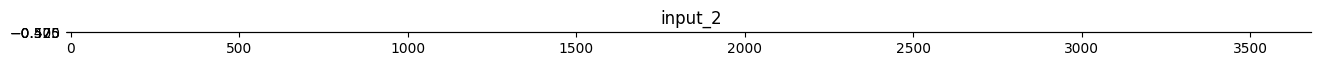

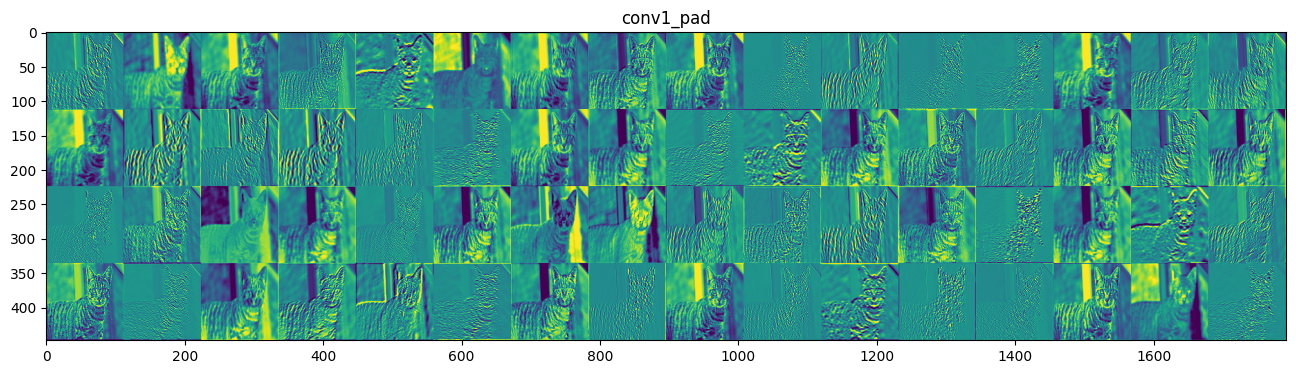

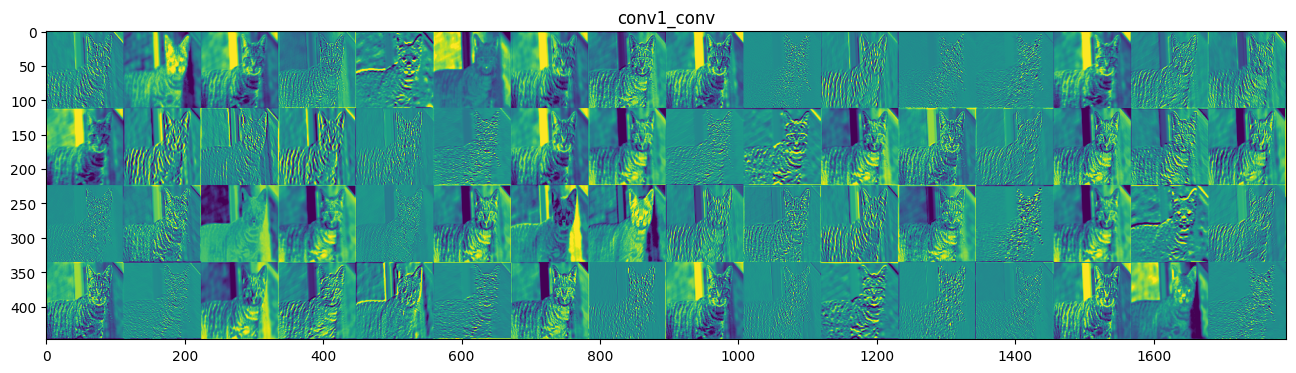

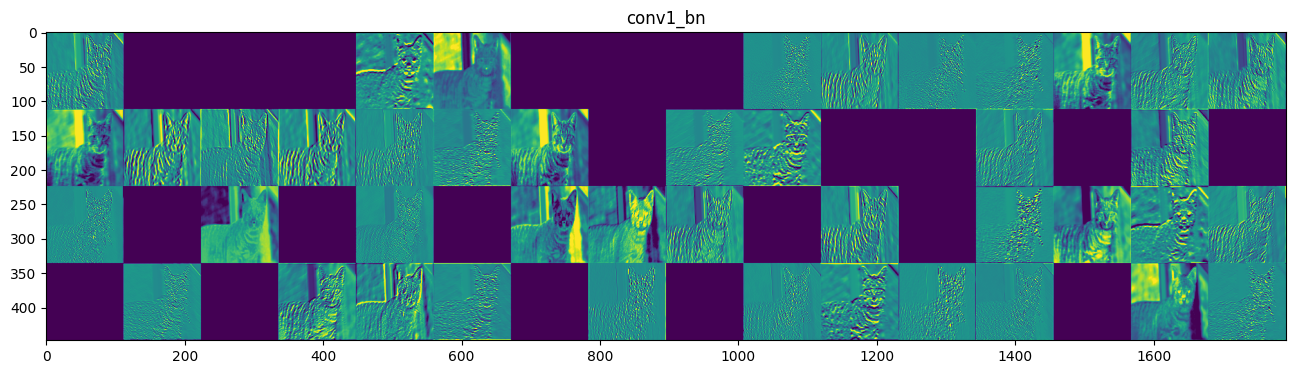

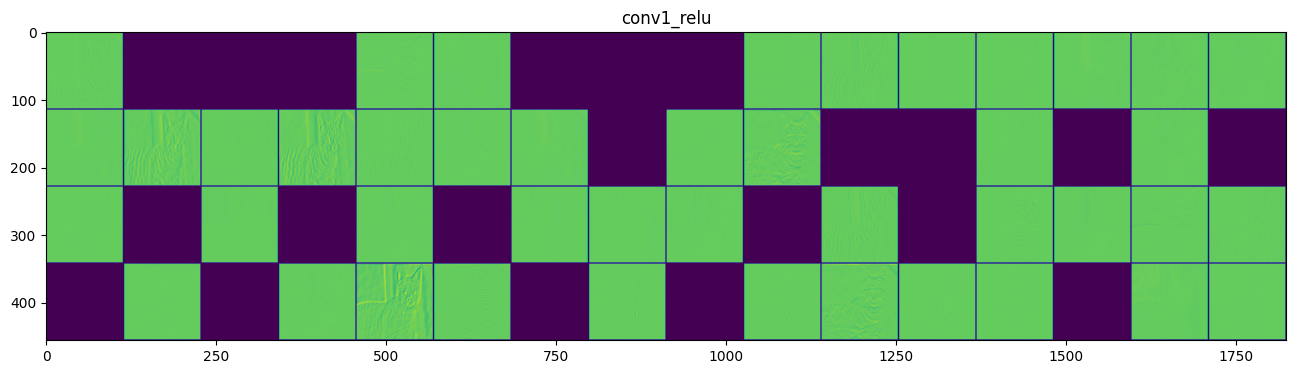

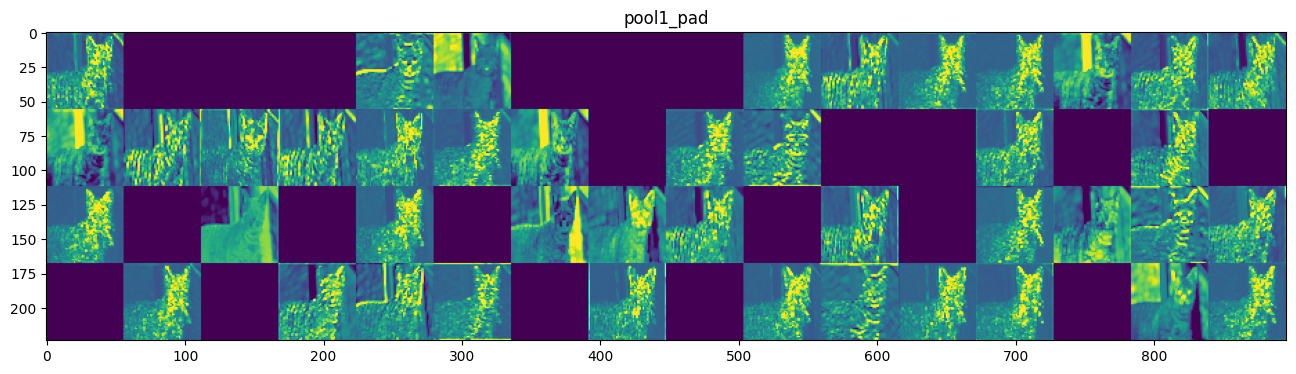

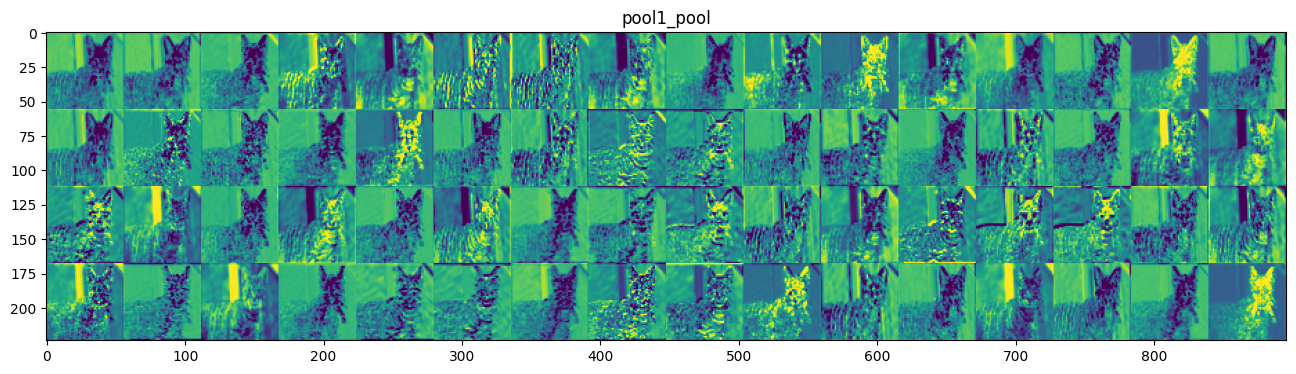

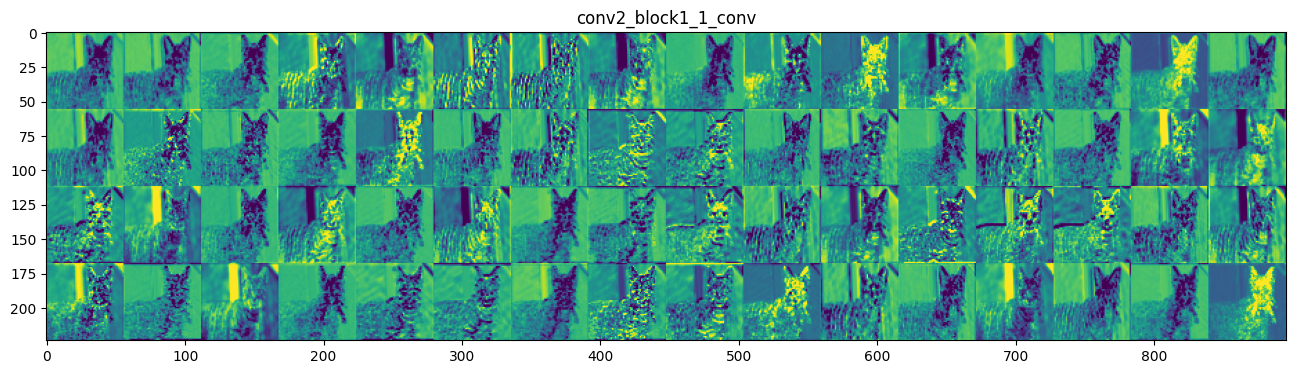

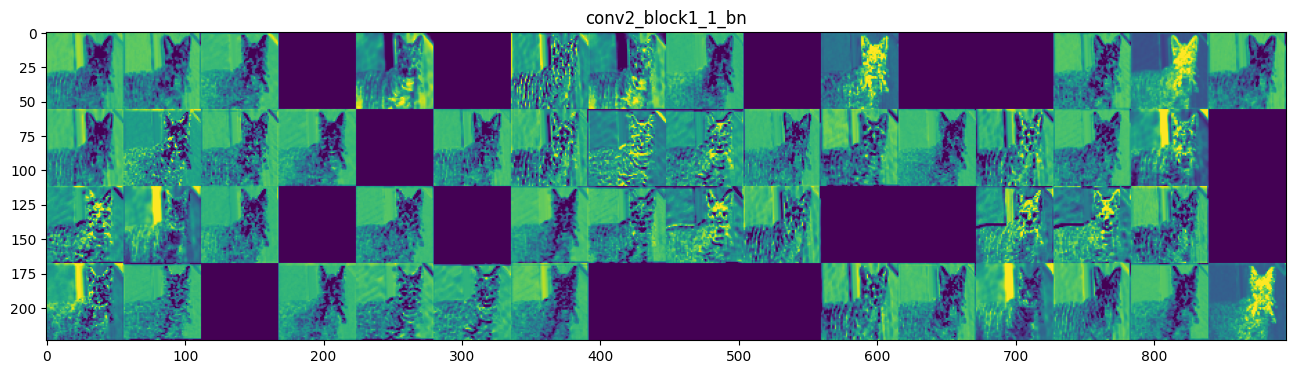

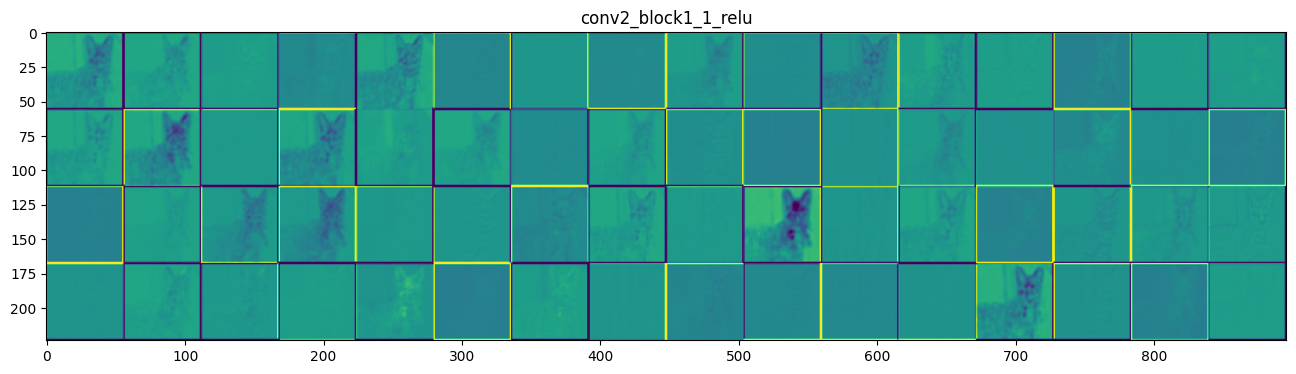

In [ ]:
layer_names = []
for layer in model.layers[:10]: #10 could be 177
  layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]
  size = layer_activation.shape[1]
  n_cols = n_features // images_per_row
  display_grid = np.zeros((size*n_cols, images_per_row*size))

  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[
          0, :, :, col*images_per_row + row
      ]
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image*=64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col*size : (col+1)*size,
                   row*size : (row+1)*size] = channel_image

  scale = 1./size
  plt.figure(figsize=(scale * display_grid.shape[1],
                      scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
print(len(activations))  # Check the shape of the activation tensor
#print(activations.item())  # Access numeric values as a NumPy array
print(activations[168][0][0][0])

176
[-0.6171528   0.5098779  -0.3029058  -0.8719318   0.26528782 -0.8316496
 -0.8670951  -0.03035557 -0.4321694   0.2454215  -0.70542145 -0.9907445
  0.37276745 -0.48433983 -0.3067236   0.35302678  0.10161829 -0.03106615
 -0.72362804  0.08361238 -0.5128237   0.42390525 -0.17238653 -0.2725969
 -0.17942348 -0.5938193   0.06355967 -0.787103   -0.51069397 -0.6707089
 -0.7034968   0.15310639 -0.544021   -2.2856011  -0.03134963 -0.0963105
 -0.6246958  -0.10371801 -0.1389949  -0.8853469  -0.47625124 -0.11852419
  1.362886   -0.11349773 -0.44383007 -1.0586678  -0.44752806  1.1698835
 -0.15205503 -0.39028606 -0.18980664 -0.09738111 -0.5041421   0.02904695
  0.06594408 -0.41003805 -0.91199976 -0.40155733 -0.12113822 -0.5590974
 -0.86474377 -0.49561337  0.18573856 -1.3048793   0.08885902  1.896519
 -0.5215575   0.10630433 -0.3702063  -0.2124353  -0.5098402  -0.5075709
 -0.42909306 -0.07548511 -0.13002121 -0.64354736 -0.67614967 -0.98080516
 -0.30906662 -0.93165934 -0.08225811  0.38602042 -0.37815

In [ ]:
print((activations[168][0][0][0]).mean())

-0.3411327


In [ ]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['axes.grid'] = False

In [ ]:
preds = tf.keras.applications.resnet50.decode_predictions

In [ ]:
def get_imagenet_label(probs):
  return decode_predictions(probs, top=1)[0][0]

In [ ]:
image_probs = model.predict(x, steps=1)

35363/35363 [==============================] - 0s 0us/step


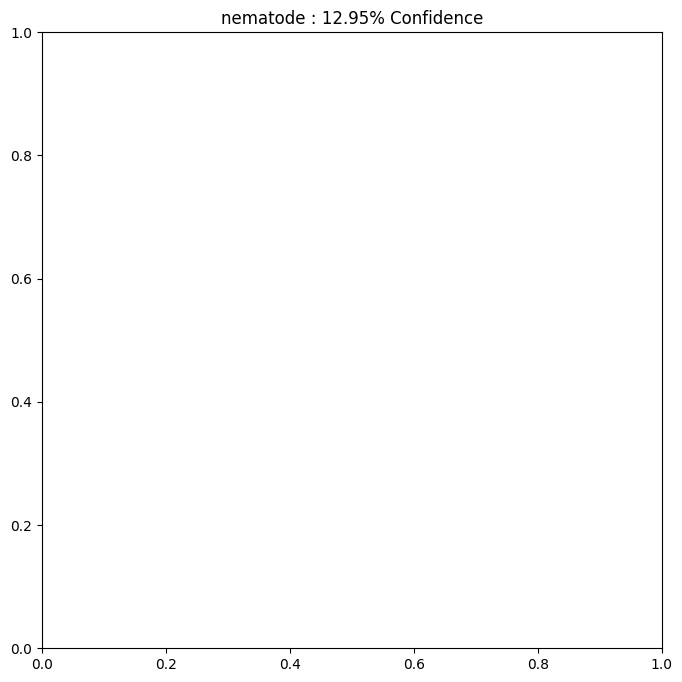

In [ ]:
plt.figure()
_, image_class, class_confidence = get_imagenet_label(image_probs)
plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
plt.show()

In [ ]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
  loss_values = []
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = model(input_image)
    loss = loss_object(input_label, prediction)
    loss_values.append(input_label-prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return loss_values, signed_grad

In [ ]:
# Get the input label of the image.
i = 208
label = tf.one_hot(i, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))

losslist, perturbations = create_adversarial_pattern(x, label)

[<tf.Tensor 'sub:0' shape=(1, 1000) dtype=float32>]


NotImplementedError: Cannot convert a symbolic tf.Tensor (sub:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported.

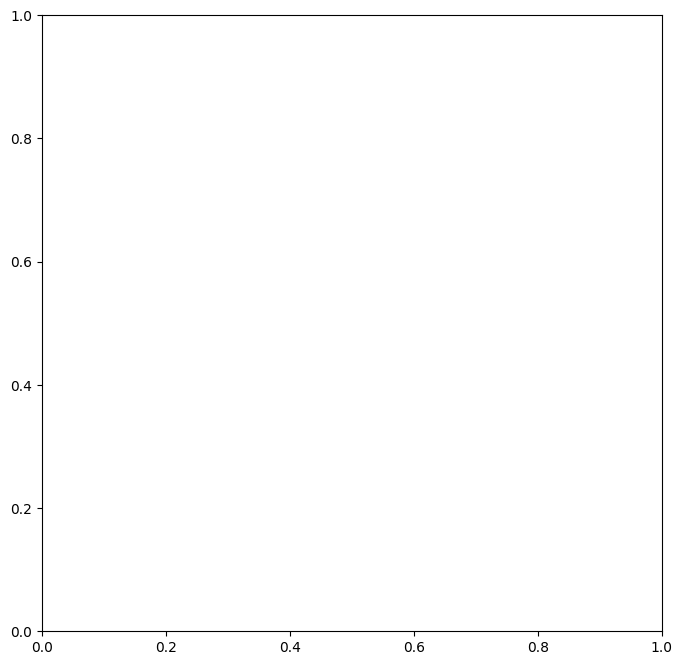

In [ ]:
print(losslist)
plt.plot(losslist)

In [ ]:
n = [25, 50, 100, 170]

In [ ]:
eps=np.arange(-0.50, 2.00, 0.10)

In [ ]:
# act_list_1 = []
# for i in eps:
#   adv_x = x + i*perturbations
#   adv_activations = activation_model.predict(adv_x, steps=1)
#   act_list_1.append(max(adv_activations[10][0][0][0]))

In [ ]:
# act_list_2 = []
# for i in eps:
#   adv_x = x + i*perturbations
#   adv_activations = activation_model.predict(adv_x, steps=1)
#   act_list_2.append(max(adv_activations[70][0][0][0]))

In [ ]:
# act_list_3 = []
# for i in eps:
#   adv_x = x + i*perturbations
#   adv_activations = activation_model.predict(adv_x, steps=1)
#   act_list_3.append(max(adv_activations[168][0][0][0]))

In [ ]:
# act_list_4 = []
# for i in eps:
#   adv_x = x + i*perturbations
#   adv_activations = activation_model.predict(adv_x, steps=1)
#   act_list_4.append(max(adv_activations[170][0][0][0]))

In [ ]:
plt.plot(eps, act_list_1)
plt.xlabel("Value of epsilon")
plt.ylabel("Activation")
plt.title('Neuron of 11th layer')
plt.show()

In [ ]:
plt.plot(eps, act_list_2)
plt.xlabel("Value of epsilon")
plt.ylabel("Activation")
plt.title('Neuron of 71st layer')
plt.show()

In [ ]:
plt.plot(eps, act_list_3)
plt.xlabel("Value of epsilon")
plt.ylabel("Activation")
plt.title('Neuron of 169th layer')
plt.show()

In [ ]:
# plt.plot(eps, act_list_4)
# plt.xlabel("Value of epsilon")
# plt.ylabel("Activation")
# plt.title('Neuron of 171st layer')
# plt.show()

In [ ]:
plt.plot(eps, act_list_1, label='26th layer')
plt.plot(eps, act_list_2, label='51st layer')
plt.plot(eps, act_list_3, label='101st layer')
plt.plot(eps, act_list_4, label='170th layer')

plt.legend()
plt.xlabel('epsilon : degree of perturbation')
plt.ylabel('Activation')
plt.title('epsilon vs Activation across layers of ResNet50')
plt.show()

In [ ]:
# def display_images(image, description):
#   _, label, confidence = get_imagenet_label(model.predict(image, steps=1))
#   plt.figure()
#   plt.imshow(image[0]*0.5+0.5)
#   plt.title('{} \n {} : {:.2f}% Confidence'.format(description,
#                                                    label, confidence*100))
#   plt.show()

In [ ]:
# epsilons = [0, 0.01, 0.1, 0.15]
# descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
#                 for eps in epsilons]

# for i, eps in enumerate(epsilons):
#   adv_x = x + eps*perturbations
#   adv_x = tf.clip_by_value(adv_x, -1, 1)
#   display_images(adv_x, descriptions[i])

In [ ]:
adv_activations = activation_model.predict(adv_x, steps=1)

In [ ]:
adv_first_layer_act = adv_activations[0]
plt.matshow(adv_first_layer_act[0, :, :, 1], cmap='viridis')

In [ ]:
print(len(adv_activations))  # Check the shape of the activation tensor
#print(activations.item())  # Access numeric values as a NumPy array
print(adv_activations[170][0][0][0])

In [ ]:
print(max(adv_activations[170][0][0][0]))